In [1]:

import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from nltk.tokenize import PunktSentenceTokenizer , TreebankWordTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import decomposition, ensemble
import pandas, numpy, string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, make_scorer
from __future__ import print_function

from pprint import pprint
from time import time
import logging
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
cd ..

/home/ubuntu/capstone/capstone


# EDA

In [3]:
#converted xml to json
df0 = pd.read_json('smokers_surrogate_all_data copy.json')

In [4]:
df=df0.copy()

In [5]:
#Transposing to rearrange columns
df=df.T

In [6]:
df=df.reset_index()

In [7]:
#giving columns names
df.columns = ['id', 'smoking_status','descrp']

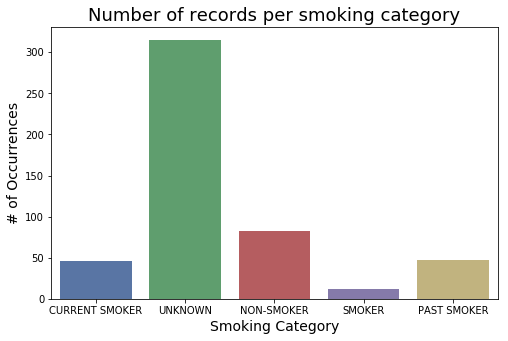

In [8]:
# Figure to see the number of records
a4_dims = (8, 5)

fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="darkgrid")

sns.countplot(x="smoking_status", data=df)
plt.title("Number of records per smoking category", fontsize=18)
plt.ylabel('# of Occurrences', fontsize=14)
plt.xlabel('Smoking Category', fontsize=14);

In [9]:
df.smoking_status.value_counts()

UNKNOWN           315
NON-SMOKER         82
PAST SMOKER        47
CURRENT SMOKER     46
SMOKER             12
Name: smoking_status, dtype: int64

# Classification -Level 1

In [10]:
# seperating records based on unknown and known smoking related text status
def unknown(column):
    if 'UNKNOWN' in column :
        return 1

    else: return 0

df["smoking_unknown"] = df["smoking_status"].apply(unknown)

In [11]:
df.head()

,id,smoking_status,descrp,smoking_unknown
0,1,CURRENT SMOKER,726132880DH9749099947532747353312/7/2006 12:00...,0
1,10,UNKNOWN,688127038 EH474495202045123/5/2002 12:00:00 AM...,1
2,100,UNKNOWN,214735961 DH97919193790395496149/9/2000 12:00:...,1
3,101,UNKNOWN,070203832 DH844654367833868044754/2/2003 12:00...,1
4,109,CURRENT SMOKER,782836641 DH9369592011119747713/15/2002 12:00:...,0


In [12]:
df.smoking_unknown.value_counts()

1    315
0    187
Name: smoking_unknown, dtype: int64

## Stop Words

In [13]:
sw=['summaryunsigneddisreport','yregistration','amed','date','patient','mm', 'st','amdischarge','doctor', 'hospital',
    'surgery','pain','problem','discharge','admission','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 
    'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am','be',
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'of', 'at', 'by', 'for', 'about', 'against', 
    'between', 'into', 'through', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
    'under', 'further', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'more', 
    'most', 'other', 'some', 'such', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'just', 'don', "don't",
    'should', "should've", 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'ma', 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'won', "won't", 'wouldn', "wouldn't"
    'aboard','about','above','across','along','an','and','another','any','around','as','at','below','behind','below'
    ,'beneath','beside','beyond','certain','down','during','each','following','for','from','inside','into','its',
    'like','minus','my','near','next','opposite','outside','out','over','plus','round','so','some','than','through',
    'toward','underneath','unlike','yet','under','unsigneded']

## Text Preprocessing

In [14]:
def text_process(description):
    
    
        
    nopunc=[char for char in description if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    splitnum  = re.split('(\d+)',nopunc)
    splitnum=' '.join(splitnum)
    new=re.sub(" \d+", " ", splitnum)
 
    
    
    swtext= [word.lower() for word in new.split() if word not in [x.upper() for x in sw]]
    
    return ' '.join(swtext)


## Modeling

In [15]:
X  = df['descrp']
y = df['smoking_unknown']

In [16]:
X_train,  X_test,  y_train, y_test  =  train_test_split(X,y,test_size=0.25, random_state=42)

In [17]:
tfidf_vect = TfidfVectorizer(preprocessor=text_process)
tfidf_vect.fit(X_train)
xtrain_tfidf =  tfidf_vect.transform(X_train)
xtest_tfidf =  tfidf_vect.transform(X_test)

#### Random Forest

In [18]:
treelist=[1,5,10,15,25,50,100,150,200,250,300,500,700,1000,1100,1200,1300]
for trees in treelist:
# for trees in range(25,300,25):
    regr = RandomForestClassifier(n_estimators=trees,random_state=42)
    regr.fit(xtrain_tfidf, y_train)
    print(trees, regr.score(xtest_tfidf,y_test))
# print(rf_score)

1 0.5952380952380952
5 0.6349206349206349
10 0.7380952380952381
15 0.7698412698412699
25 0.7936507936507936
50 0.8095238095238095
100 0.8333333333333334
150 0.8492063492063492
200 0.8333333333333334
250 0.8412698412698413
300 0.8571428571428571
500 0.8492063492063492
700 0.8650793650793651
1000 0.8650793650793651
1100 0.8571428571428571
1200 0.8571428571428571
1300 0.8571428571428571


In [19]:
pip = Pipeline([
    ('vect', TfidfVectorizer(sublinear_tf=True,
                             preprocessor=text_process,
                             )),
     ('clf',RandomForestClassifier(n_estimators=300) )])

# Number of trees in random forest

# Number of features to consider at every split
max_features = ['auto', 'sqrt',0.2]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 5)]



# Create the random grid


rf_param = {'vect__use_idf': (True, False),
                'vect__norm': ('l1', 'l2'),
               'vect__min_df':[1,2,3,4,5], 
                'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
               'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
               'vect__max_features':[2000,3000,4000,5000,7000,8000],
              'clf__max_features': max_features,
              'clf__max_depth': max_depth,
              'clf__min_samples_split': min_samples_split,
              'clf__min_samples_leaf': min_samples_leaf,
              'clf__random_state':[15325,42,100,1]
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = pip, param_distributions = rf_param, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 25.5min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function text_pr...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__use_idf': (True, False), 'vect__norm': ('l1', 'l2'), 'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'vect__max_features': [2000, 3000, 4000, 5000, 7000, 8000], 'clf__max_fe... 5, 7, 10], 'clf__min_samples_leaf': [1, 25, 50, 75, 100], 'clf__random_state': [15325, 42, 100, 1]},
          pre_dispatch='2

In [20]:
rf_random.best_params_

{'vect__use_idf': True,
 'vect__norm': 'l1',
 'vect__ngram_range': (1, 2),
 'vect__min_df': 1,
 'vect__max_features': 7000,
 'vect__max_df': 1.0,
 'clf__random_state': 100,
 'clf__min_samples_split': 7,
 'clf__min_samples_leaf': 1,
 'clf__max_features': 0.2,
 'clf__max_depth': 90}

In [21]:
rf_random.best_score_

0.9676569864763668

#### Naive Bayes

In [22]:
pip_nb = Pipeline([
    ('vect', CountVectorizer(preprocessor=text_process)),
     ('tfidf', TfidfTransformer()),
     ('clf',MultinomialNB() )])



nb_param = {'vect__min_df':[1,2,3,4,5], 
           'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
           'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
           'tfidf__use_idf': (True, False),
            'tfidf__norm': ('l1', 'l2'),
           'tfidf__sublinear_tf': (True, False),
           'clf__alpha':(1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
nb_random = RandomizedSearchCV(random_state=15325,estimator = pip_nb, param_distributions = nb_param, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
nb_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 24.5min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function text_process at 0x...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'tfidf__sublinear_tf': (True, False), 'clf__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)},
          pre_dispatch='2*n_jobs', random_state=15325, refit=True,
          return_train_score='warn', scori

In [23]:
nb_random.best_params_

{'vect__ngram_range': (1, 2),
 'vect__min_df': 5,
 'vect__max_df': 0.6,
 'tfidf__use_idf': False,
 'tfidf__sublinear_tf': True,
 'tfidf__norm': 'l2',
 'clf__alpha': 1e-05}

In [24]:
nb_random.best_score_

0.847212127219065

#### Gradient Boosting

In [25]:
treelist=[1,5,10,15,25,50,100,150,200,250,300,500,700,1000,1100,1200,1300]
for trees in treelist:
# for trees in range(25,300,25):
    regr = GradientBoostingClassifier(n_estimators=trees,random_state=42)
    regr.fit(xtrain_tfidf, y_train)
    print(trees, regr.score(xtest_tfidf,y_test))
# print(rf_score)

1 0.626984126984127
5 0.873015873015873
10 0.8809523809523809
15 0.8888888888888888
25 0.9126984126984127
50 0.9365079365079365
100 0.9444444444444444
150 0.9444444444444444
200 0.9444444444444444
250 0.9365079365079365
300 0.9444444444444444
500 0.9365079365079365
700 0.9365079365079365
1000 0.9365079365079365
1100 0.9365079365079365
1200 0.9365079365079365
1300 0.9365079365079365


In [26]:
pip_gb = Pipeline([
    ('vect', TfidfVectorizer(
                             preprocessor=text_process, 
                             stop_words=sw,
                             )),
     ('clf',GradientBoostingClassifier(n_estimators=100) )])




# Create the random grid


gb_params = {'vect__use_idf': (True, False),
                'vect__norm': ('l1', 'l2'),
               'vect__sublinear_tf': (True, False),
               'vect__min_df':[1,2,3,4,5], 
                'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
                'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
               'vect__max_features':[2000,3000,4000,5000,7000,8000],
                  'clf__learning_rate': [0.15,0.1,0.05,0.02,0.01,0.005,0.001],
                  'clf__min_samples_split':[int(x) for x in np.linspace(2, 20, num = 2)],
              'clf__max_depth': [int(x) for x in np.linspace(1, 15, num = 2)],
              'clf__min_samples_leaf': [int(x) for x in np.linspace(1, 100, num = 5)],
              'clf__subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1],
                  'clf__max_features':['auto','sqrt',0.2,0.1]
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(random_state=15325,estimator = pip_gb, param_distributions = gb_params, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
gb_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 24.2min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function text_pr...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__use_idf': (True, False), 'vect__norm': ('l1', 'l2'), 'vect__sublinear_tf': (True, False), 'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'vect__max_features': [2000, 3000, ...__subsample': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1], 'clf__max_features': ['auto', 'sqrt', 0.2, 0.1]},
          pre_dispatch='2

In [27]:
gb_random.best_score_

0.98638275846879

In [28]:
gb_random.best_params_

{'vect__use_idf': True,
 'vect__sublinear_tf': False,
 'vect__norm': 'l2',
 'vect__ngram_range': (1, 2),
 'vect__min_df': 4,
 'vect__max_features': 3000,
 'vect__max_df': 0.8,
 'clf__subsample': 0.8,
 'clf__min_samples_split': 20,
 'clf__min_samples_leaf': 1,
 'clf__max_features': 'auto',
 'clf__max_depth': 15,
 'clf__learning_rate': 0.05}

#### Logistic regression

In [29]:
pip_lr = Pipeline([
    ('vect', TfidfVectorizer(
                             preprocessor=text_process, 
                             stop_words=sw,
                             )),
     ('clf',LogisticRegression())])


lr_params={'vect__use_idf': (True, False),
                'vect__norm': ('l1', 'l2'),
               'vect__sublinear_tf': (True, False),
               'vect__min_df':[1,2,3,4,5], 
                'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
                'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
               'vect__max_features':[2000,3000,4000,5000,7000,8000],
           'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'clf__penalty':['l1','l2']}

lr_random = RandomizedSearchCV(random_state=15325,estimator = pip_lr, param_distributions = lr_params, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
lr_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 23.8min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function text_pr...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__use_idf': (True, False), 'vect__norm': ('l1', 'l2'), 'vect__sublinear_tf': (True, False), 'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'vect__max_features': [2000, 3000, 4000, 5000, 7000, 8000], 'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'clf__penalty': ['l1', 'l2']},
          pre_dispatch='2*

In [30]:
lr_random.best_score_

0.9667353585745122

In [31]:
lr_random.best_params_

{'vect__use_idf': True,
 'vect__sublinear_tf': True,
 'vect__norm': 'l2',
 'vect__ngram_range': (1, 3),
 'vect__min_df': 4,
 'vect__max_features': 3000,
 'vect__max_df': 0.9,
 'clf__penalty': 'l1',
 'clf__C': 1000}

# Classification- Level 2

In [32]:
df1=df.copy()

In [33]:
secondf=df1[df1.smoking_unknown==0]

In [34]:
secondf.head()

,id,smoking_status,descrp,smoking_unknown
0,1,CURRENT SMOKER,726132880DH9749099947532747353312/7/2006 12:00...,0
4,109,CURRENT SMOKER,782836641 DH9369592011119747713/15/2002 12:00:...,0
5,111,NON-SMOKER,081039790 EH0586196722141427/23/2003 12:00:00 ...,0
10,121,SMOKER,403426241 EH1248981382315612/13/2002 12:00:00 ...,0
11,130,CURRENT SMOKER,897261359 EH7423428587654175/23/2003 12:00:00 ...,0


## Data preprocessing

In [35]:
# Out of the known smoking records, classifiy them based on the non smoker status
def smokerclass(column):
    if 'NON-SMOKER' in column :
        return 1

    else: return 0

secondf["smoking_nonsmoking"] = secondf["smoking_status"].apply(smokerclass)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
secondf.head()

,id,smoking_status,descrp,smoking_unknown,smoking_nonsmoking
0,1,CURRENT SMOKER,726132880DH9749099947532747353312/7/2006 12:00...,0,0
4,109,CURRENT SMOKER,782836641 DH9369592011119747713/15/2002 12:00:...,0,0
5,111,NON-SMOKER,081039790 EH0586196722141427/23/2003 12:00:00 ...,0,1
10,121,SMOKER,403426241 EH1248981382315612/13/2002 12:00:00 ...,0,0
11,130,CURRENT SMOKER,897261359 EH7423428587654175/23/2003 12:00:00 ...,0,0


In [37]:
secondf.smoking_nonsmoking.value_counts()

0    105
1     82
Name: smoking_nonsmoking, dtype: int64

### Modeling

In [71]:
X  = secondf['descrp']
y = secondf['smoking_nonsmoking']


In [72]:
X_train,  X_test,  y_train, y_test  =  train_test_split(X,y,test_size=0.25, random_state=50)

In [73]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
xtrain_tfidf =  tfidf_vect.transform(X_train)
xtest_tfidf =  tfidf_vect.transform(X_test)



#### Random Forest

In [66]:
treelist=[1,5,10,15,25,50,60,70,100,150,200,250,300,500,700,1000,1100,1200,1300]
for trees in treelist:
# for trees in range(25,300,25):
    regr = RandomForestClassifier(n_estimators=trees,random_state=42)
    regr.fit(xtrain_tfidf, y_train)
    print(trees, regr.score(xtest_tfidf,y_test))
# print(rf_score)

1 0.6382978723404256
5 0.723404255319149
10 0.7021276595744681
15 0.723404255319149
25 0.7446808510638298
50 0.7446808510638298
60 0.723404255319149
70 0.6808510638297872
100 0.6808510638297872
150 0.6808510638297872
200 0.6595744680851063
250 0.6595744680851063
300 0.6382978723404256
500 0.6170212765957447
700 0.6170212765957447
1000 0.6170212765957447
1100 0.6170212765957447
1200 0.5957446808510638
1300 0.6170212765957447


In [68]:
pip = Pipeline([
    ('vect', TfidfVectorizer(sublinear_tf=True,
                             preprocessor=text_process, 
                             stop_words=sw,
                             )),
     ('clf',RandomForestClassifier() )])


# Number of features to consider at every split
max_features = ['auto', 'sqrt',0.2]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 5)]



# Create the random grid


rf_param = {'vect__use_idf': (True, False),
                'vect__norm': ('l1', 'l2'),
               'vect__min_df':[1,2,3,4,5], 
                'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
               'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
               'vect__max_features':[2000,3000,4000,5000,7000,8000],
                'clf__n_estimators':[int(x) for x in np.linspace(10, 1000, num = 10)],
              'clf__max_features': max_features,
              'clf__max_depth': max_depth,
              'clf__min_samples_split': min_samples_split,
              'clf__min_samples_leaf': min_samples_leaf,
              
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(random_state=15325,estimator = pip, param_distributions = rf_param, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 13.1min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function text_pr...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__use_idf': (True, False), 'vect__norm': ('l1', 'l2'), 'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'vect__max_features': [2000, 3000, 4000, 5000, 7000, 8000], 'clf__n_esti..., 100, 110], 'clf__min_samples_split': [2, 5, 7, 10], 'clf__min_samples_leaf': [1, 25, 50, 75, 100]},
          pre_dispatch='2

In [69]:
rf_random.best_params_

{'vect__use_idf': False,
 'vect__norm': 'l2',
 'vect__ngram_range': (1, 2),
 'vect__min_df': 2,
 'vect__max_features': 4000,
 'vect__max_df': 1.0,
 'clf__n_estimators': 450,
 'clf__min_samples_split': 7,
 'clf__min_samples_leaf': 1,
 'clf__max_features': 0.2,
 'clf__max_depth': 10}

In [70]:
rf_random.best_score_

0.8357993197278911

#### Naive Bayes

In [74]:
pip_nb = Pipeline([
    ('vect', TfidfVectorizer(preprocessor=text_process)),
     ('clf',MultinomialNB() )])



nb_param = {'vect__min_df':[1,2,3,4,5], 
           'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
           'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
           'vect__use_idf': (True, False),
            'vect__norm': ('l1', 'l2'),
           'vect__sublinear_tf': (True, False),
           'clf__alpha':(1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
nb_random = RandomizedSearchCV(random_state=15325,estimator = pip_nb, param_distributions = nb_param, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
nb_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 12.3min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function text_pr...se_idf=True, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'vect__use_idf': (True, False), 'vect__norm': ('l1', 'l2'), 'vect__sublinear_tf': (True, False), 'clf__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)},
          pre_dispatch='2*n_jobs', random_state=15325, refit=True,
          return_train_score='warn', scoring=

In [75]:
nb_random.best_score_

0.7744047619047619

In [76]:
nb_random.best_params_

{'vect__use_idf': False,
 'vect__sublinear_tf': True,
 'vect__norm': 'l2',
 'vect__ngram_range': (2, 4),
 'vect__min_df': 1,
 'vect__max_df': 0.8,
 'clf__alpha': 1e-05}

#### Logistic regression

In [77]:
pip_lr = Pipeline([
    ('vect', TfidfVectorizer(
                             preprocessor=text_process, 
                             stop_words=sw,
                             )),
     ('clf',LogisticRegression())])


lr_params={'vect__use_idf': (True, False),
                'vect__norm': ('l1', 'l2'),
               'vect__sublinear_tf': (True, False),
               'vect__min_df':[1,2,3,4,5], 
                'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
                'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
               'vect__max_features':[2000,3000,4000,5000,7000,8000],
           'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'clf__penalty':['l1','l2']}

lr_random = RandomizedSearchCV(random_state=15325,estimator = pip_lr, param_distributions = lr_params, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
lr_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 12.1min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function text_pr...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__use_idf': (True, False), 'vect__norm': ('l1', 'l2'), 'vect__sublinear_tf': (True, False), 'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'vect__max_features': [2000, 3000, 4000, 5000, 7000, 8000], 'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'clf__penalty': ['l1', 'l2']},
          pre_dispatch='2*

In [78]:
lr_random.best_params_

{'vect__use_idf': True,
 'vect__sublinear_tf': True,
 'vect__norm': 'l2',
 'vect__ngram_range': (1, 3),
 'vect__min_df': 4,
 'vect__max_features': 3000,
 'vect__max_df': 0.9,
 'clf__penalty': 'l1',
 'clf__C': 1000}

In [79]:
lr_random.best_score_

0.8205357142857143

#### Gradient Boosting

In [45]:
treelist=[1,5,10,15,25,50,100,110,120,130,150,200,250,300,500,700,1000,1100,1200,1300]
for trees in treelist:
# for trees in range(25,300,25):
    regr = GradientBoostingClassifier(n_estimators=trees,random_state=42)
    regr.fit(xtrain_tfidf, y_train)
    print(trees, regr.score(xtest_tfidf,y_test))
# print(rf_score)

1 0.6595744680851063
5 0.7021276595744681
10 0.7446808510638298
15 0.723404255319149
25 0.7021276595744681
50 0.723404255319149
100 0.723404255319149
110 0.723404255319149
120 0.723404255319149
130 0.723404255319149
150 0.7021276595744681
200 0.6808510638297872
250 0.723404255319149
300 0.723404255319149
500 0.723404255319149
700 0.723404255319149
1000 0.723404255319149
1100 0.723404255319149
1200 0.723404255319149
1300 0.723404255319149


In [46]:
pip_gb = Pipeline([
    ('vect', TfidfVectorizer(
                             preprocessor=text_process, 
                             stop_words=sw,
                             )),
     ('clf',GradientBoostingClassifier(n_estimators=50) )])



# Create the random grid


gb_params = {'vect__use_idf': (True, False),
                'vect__norm': ('l1', 'l2'),
               'vect__sublinear_tf': (True, False),
               'vect__min_df':[1,2,3,4,5], 
                'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
                'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
               'vect__max_features':[2000,3000,4000,5000,7000,8000],
                  'clf__learning_rate': [0.15,0.1,0.05,0.02,0.01,0.005,0.001],
                  'clf__min_samples_split':[int(x) for x in np.linspace(2, 20, num = 2)],
              'clf__max_depth': [int(x) for x in np.linspace(1, 15, num = 2)],
              'clf__min_samples_leaf': [int(x) for x in np.linspace(1, 100, num = 5)],
              'clf__subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1],
                  'clf__max_features':['auto','sqrt',0.2,0.1]
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = pip_gb, param_distributions = gb_params, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
gb_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 12.0min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function text_pr...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__use_idf': (True, False), 'vect__norm': ('l1', 'l2'), 'vect__sublinear_tf': (True, False), 'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'vect__max_features': [2000, 3000, ...__subsample': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1], 'clf__max_features': ['auto', 'sqrt', 0.2, 0.1]},
          pre_dispatch='2

In [47]:
gb_random.best_score_

0.8461309523809525

In [48]:
gb_random.best_params_

{'vect__use_idf': False,
 'vect__sublinear_tf': True,
 'vect__norm': 'l1',
 'vect__ngram_range': (1, 2),
 'vect__min_df': 2,
 'vect__max_features': 4000,
 'vect__max_df': 0.8,
 'clf__subsample': 0.9,
 'clf__min_samples_split': 20,
 'clf__min_samples_leaf': 1,
 'clf__max_features': 'auto',
 'clf__max_depth': 15,
 'clf__learning_rate': 0.1}

## Classification Final Layer

In [80]:
thirdf=secondf[secondf.smoking_nonsmoking==0]

In [81]:
def smokerclass3rd(column):
    if 'PAST SMOKER' in column :
        return 1

    else :return 0

thirdf["smoking_past"] = thirdf["smoking_status"].apply(smokerclass3rd)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [51]:
thirdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 486
Data columns (total 6 columns):
id                    105 non-null int64
smoking_status        105 non-null object
descrp                105 non-null object
smoking_unknown       105 non-null int64
smoking_nonsmoking    105 non-null int64
smoking_past          105 non-null int64
dtypes: int64(4), object(2)
memory usage: 5.7+ KB


In [82]:
X  = thirdf['descrp']
y = thirdf['smoking_past']

In [83]:
X_train,  X_test,  y_train, y_test  =  train_test_split(X,y,test_size=0.25, random_state=50)

In [84]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
xtrain_tfidf =  tfidf_vect.transform(X_train)
xtest_tfidf =  tfidf_vect.transform(X_test)

#### Random Forest

In [55]:
treelist=[1,5,10,15,25,50,100,150,200,250,300,500,700,1000,1100,1200,1300]
for trees in treelist:
# for trees in range(25,300,25):
    regr = RandomForestClassifier(n_estimators=trees,random_state=42)
    regr.fit(xtrain_tfidf, y_train)
    print(trees, regr.score(xtest_tfidf,y_test))
# print(rf_score)

1 0.4444444444444444
5 0.5555555555555556
10 0.5185185185185185
15 0.5555555555555556
25 0.5555555555555556
50 0.5185185185185185
100 0.5555555555555556
150 0.48148148148148145
200 0.5555555555555556
250 0.5925925925925926
300 0.5555555555555556
500 0.5555555555555556
700 0.5925925925925926
1000 0.5925925925925926
1100 0.6296296296296297
1200 0.6296296296296297
1300 0.5925925925925926


In [56]:
pip = Pipeline([
    ('vect', TfidfVectorizer(sublinear_tf=True,
                             
                             preprocessor=text_process, 
                             stop_words=sw,
                             )),
     ('clf',RandomForestClassifier(n_estimators=1200) )])





# Create the random grid


rf_param = {'vect__use_idf': (True, False),
                'vect__norm': ('l1', 'l2'),
               'vect__min_df':[1,2,3,4,5], 
                'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
               'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
               'vect__max_features':[2000,3000,4000,5000,7000,8000],
              'clf__max_features': max_features,
              'clf__max_depth': max_depth,
              'clf__min_samples_split': min_samples_split,
              'clf__min_samples_leaf': min_samples_leaf,
              
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = pip, param_distributions = rf_param, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  8.7min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function text_pr...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__use_idf': (True, False), 'vect__norm': ('l1', 'l2'), 'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'vect__max_features': [2000, 3000, 4000, 5000, 7000, 8000], 'clf__max_features': ['auto', 'sqrt', 0.2], 'clf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'clf__min_samples_split': [2, 5,

In [57]:
rf_random.best_params_

{'vect__use_idf': True,
 'vect__norm': 'l2',
 'vect__ngram_range': (1, 4),
 'vect__min_df': 2,
 'vect__max_features': 8000,
 'vect__max_df': 0.7,
 'clf__min_samples_split': 5,
 'clf__min_samples_leaf': 1,
 'clf__max_features': 0.2,
 'clf__max_depth': 100}

In [58]:
rf_random.best_score_

0.7309829059829059

#### Naive Bayes

In [85]:
pip_nb = Pipeline([
    ('vect', TfidfVectorizer(preprocessor=text_process)),
     ('clf',MultinomialNB() )])



nb_param = {'vect__min_df':[1,2,3,4,5], 
           'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
           'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
           'vect__use_idf': (True, False),
            'vect__norm': ('l1', 'l2'),
           'vect__sublinear_tf': (True, False),
           'clf__alpha':(1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
nb_random = RandomizedSearchCV(random_state=15325,estimator = pip_nb, param_distributions = nb_param, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
nb_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.2min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function text_pr...se_idf=True, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'vect__use_idf': (True, False), 'vect__norm': ('l1', 'l2'), 'vect__sublinear_tf': (True, False), 'clf__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)},
          pre_dispatch='2*n_jobs', random_state=15325, refit=True,
          return_train_score='warn', scoring=

In [86]:
nb_random.best_score_

0.7286324786324787

In [88]:
nb_random.best_params_

{'vect__use_idf': True,
 'vect__sublinear_tf': False,
 'vect__norm': 'l2',
 'vect__ngram_range': (2, 5),
 'vect__min_df': 1,
 'vect__max_df': 1.0,
 'clf__alpha': 0.0001}

#### Logistic Regression

In [89]:
pip_lr = Pipeline([
    ('vect', TfidfVectorizer(
                             preprocessor=text_process, 
                             stop_words=sw,
                             )),
     ('clf',LogisticRegression())])


lr_params={'vect__use_idf': (True, False),
                'vect__norm': ('l1', 'l2'),
               'vect__sublinear_tf': (True, False),
               'vect__min_df':[1,2,3,4,5], 
                'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
                'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
               'vect__max_features':[2000,3000,4000,5000,7000,8000],
           'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'clf__penalty':['l1','l2']}

lr_random = RandomizedSearchCV(random_state=15325,estimator = pip_lr, param_distributions = lr_params, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
lr_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.1min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function text_pr...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__use_idf': (True, False), 'vect__norm': ('l1', 'l2'), 'vect__sublinear_tf': (True, False), 'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'vect__max_features': [2000, 3000, 4000, 5000, 7000, 8000], 'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'clf__penalty': ['l1', 'l2']},
          pre_dispatch='2*

In [90]:
lr_random.best_score_

0.7311965811965812

In [91]:
lr_random.best_params_

{'vect__use_idf': False,
 'vect__sublinear_tf': True,
 'vect__norm': 'l1',
 'vect__ngram_range': (1, 2),
 'vect__min_df': 1,
 'vect__max_features': 5000,
 'vect__max_df': 0.7,
 'clf__penalty': 'l2',
 'clf__C': 1000}

#### Gradient Boosting

In [59]:
treelist=[1,5,10,15,25,50,100,150,200,250,300,500,700,1000,1100,1200,1300]
for trees in treelist:
# for trees in range(25,300,25):
    regr = GradientBoostingClassifier(n_estimators=trees,random_state=42)
    regr.fit(xtrain_tfidf, y_train)
    print(trees, regr.score(xtest_tfidf,y_test))
# print(rf_score)

1 0.5555555555555556
5 0.5555555555555556
10 0.5185185185185185
15 0.5185185185185185
25 0.5925925925925926
50 0.5925925925925926
100 0.5925925925925926
150 0.5555555555555556
200 0.5555555555555556
250 0.5555555555555556
300 0.5555555555555556
500 0.5555555555555556
700 0.5555555555555556
1000 0.5555555555555556
1100 0.5555555555555556
1200 0.5555555555555556
1300 0.5555555555555556


In [60]:
pip_gb = Pipeline([
    ('vect', TfidfVectorizer(
                             preprocessor=text_process, 
                             stop_words=sw,
                             )),
     ('clf',GradientBoostingClassifier(n_estimators=100) )])




# Create the random grid


gb_params = {'vect__use_idf': (True, False),
                'vect__norm': ('l1', 'l2'),
               'vect__sublinear_tf': (True, False),
               'vect__min_df':[1,2,3,4,5], 
                'vect__max_df':[0.6,0.7,0.8,0.9,1.0],
                'vect__ngram_range':[(1,2),(1,3),(1,4),(2,3),(2,4),(2,5)],
               'vect__max_features':[2000,3000,4000,5000,7000,8000],
                  'clf__learning_rate': [0.15,0.1,0.05,0.02,0.01,0.005,0.001],
                  'clf__min_samples_split':[int(x) for x in np.linspace(2, 20, num = 2)],
              'clf__max_depth': [int(x) for x in np.linspace(1, 15, num = 2)],
              'clf__min_samples_leaf': [int(x) for x in np.linspace(1, 100, num = 5)],
              'clf__subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1],
                  'clf__max_features':['auto','sqrt',0.2,0.1]
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = pip_gb, param_distributions = gb_params, cv = 10,n_iter = 100,scoring='roc_auc' ,verbose=1,  n_jobs = -1)
# Fit the random search model
gb_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.3min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function text_pr...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'vect__use_idf': (True, False), 'vect__norm': ('l1', 'l2'), 'vect__sublinear_tf': (True, False), 'vect__min_df': [1, 2, 3, 4, 5], 'vect__max_df': [0.6, 0.7, 0.8, 0.9, 1.0], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5)], 'vect__max_features': [2000, 3000, ...__subsample': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1], 'clf__max_features': ['auto', 'sqrt', 0.2, 0.1]},
          pre_dispatch='2

In [61]:
gb_random.best_score_

0.719871794871795

In [62]:
gb_random.best_params_

{'vect__use_idf': False,
 'vect__sublinear_tf': False,
 'vect__norm': 'l2',
 'vect__ngram_range': (1, 2),
 'vect__min_df': 4,
 'vect__max_features': 4000,
 'vect__max_df': 0.8,
 'clf__subsample': 0.8,
 'clf__min_samples_split': 2,
 'clf__min_samples_leaf': 1,
 'clf__max_features': 'sqrt',
 'clf__max_depth': 15,
 'clf__learning_rate': 0.005}